## Assignment 3
By Nitin Reddy and Siddharth Sundararajan

In [19]:
# Jackknife function
Jackknife<-function(v1,statfunc=sd, alpha = 0.05)
{
  n1<-length(v1)
  jackvec<-NULL
  mu0<-statfunc(v1)
  for(i in 1:n1){
    mua<-statfunc(v1[-i])
    jackvec<-c(jackvec, n1*(mu0)-(n1-1)*mua)
  }
  jackbias<-mean(jackvec)-mu0
  jacksd<-sd(jackvec)
  JLB<-mean(jackvec)-(jacksd/sqrt(n1))*qnorm(1-alpha/2)
  JUB<-mean(jackvec)+(jacksd/sqrt(n1))*qnorm(1-alpha/2)
  list(mu0=mu0,jackbias=jackbias,jacksd=jacksd, 
       jackknife.confidence.interval = c(JLB, JUB))
}

In [2]:
Jackknife(1:1000, statfunc = mean)

$mu0
[1] 500.5

$jackbias
[1] 0

$jacksd
[1] 288.8194

$jackknife.confidence.interval
[1] 482.5991 518.4009

#### Observations
We observe that the bias is zero. This happens because the statistic we are building the estimator for the mean.

In [3]:
# Bootstrap function
my.bootstrapci.ml<-function(vec0,nboot=10000,alpha=0.05)
{
  #extract sample size, mean and standard deviation from the 
  #original data
  n0<-length(vec0)
  mean0<-mean(vec0)
  sd0<-sqrt(var(vec0))
  #create a vector to store the location of the bootstrap 
  #studentized deviation vector
  bootvec<-NULL
  bootbiasvec<-NULL
  #create the bootstrap distribution using a for loop
  for( i in 1:nboot){
    vecb<-sample(vec0,replace=T)
    #create mean and standard deviation to studentize
    meanb<-mean(vecb)
    sdb<-sqrt(var(vecb))
    #note since resampling full vector we can use n0 for sample size of vecb
    bootvec<-c(bootvec,(meanb-mean0)/(sdb/sqrt(n0)))
    #Calculation the vector that stores the bias of each bootstap sample
    bootbiasvec <- c(bootbiasvec, meanb-mean0)
  }
  
  bootbias <- mean(bootbiasvec)  
  bootsd <- mean(bootvec) #***************** Not sure about this ****************#
  #Calculate lower and upper quantile of the bootstrap distribution
  lq<-quantile(bootvec,alpha/2)
  uq<-quantile(bootvec,1-alpha/2)
  #incorporate into the bootstrap confidence interval (what algebra supports this?)
  #and output result
  LB<-mean0-(sd0/sqrt(n0))*uq[[1]]
  UB<-mean0-(sd0/sqrt(n0))*lq[[1]]
  #since I have the mean and standard deviation calculate the 
  #normal confidence interval here as well
  NLB<-mean0-(sd0/sqrt(n0))*qnorm(1-alpha/2)
  NUB<-mean0+(sd0/sqrt(n0))*qnorm(1-alpha/2)
  list(bootbias = bootbias, bootsd = bootsd, bootstrap.confidence.interval=c(LB,UB)
       ,normal.confidence.interval=c(NLB,NUB))
}

In [4]:
my.bootstrapci.ml(1:1000)

$bootbias
[1] 0.0665395

$bootsd
[1] 0.007247316

$bootstrap.confidence.interval
[1] 482.1930 517.9346

$normal.confidence.interval
[1] 482.5991 518.4009

#### Observations
It is seen that the normal based confidence interval is same as the Jackknife based confidence interval. This reason was seen above. The pivotal based confidence interval is observed to be around the normal based confidence interval but comparitively closer in this case. 

In [5]:
# Simulation function
simulation <- function(mu.val=3, n=30, nsim=1000)
{
  #create coverage indicator vectors for bootstrap and normal
  cvec.boot<-NULL
  cvec.norm<-NULL
  cvec.jack<-NULL
  #calculate real mean
  mulnorm<-(exp(mu.val+1/2))
  #run simulation
  for(i in 1:nsim){
    if((i/100)==floor(i/100)){
      print(i)
      #let me know computer hasnt died
    }
    #sample the simulation vector
    vec.sample<-rlnorm(n,mu.val)
    #bootstrap it
    boot.list<-my.bootstrapci.ml(vec.sample)
    #jackknife it
    jack.list <- Jackknife(vec.sample, statfunc=mean, alpha = 0.05)
    #fetch confidence intervals
    boot.conf<-boot.list$bootstrap.confidence.interval
    jack.conf<-jack.list$jackknife.confidence.interval
    norm.conf<-boot.list$normal.confidence.interval
    
    #calculate if confidence intervals include mu
    #count up the coverage by the bootstrap interval
    cvec.boot<-c(cvec.boot,(boot.conf[1]<mulnorm)*(boot.conf[2]>mulnorm))
    #count up the coverage by the jackknife interval
    cvec.jack<-c(cvec.jack,(jack.conf[1]<mulnorm)*(jack.conf[2]>mulnorm))
    #count up the coverage by the normal theory interval
    cvec.norm<-c(cvec.norm,(norm.conf[1]<mulnorm)*(norm.conf[2]>mulnorm))
  }
  #calculate and output coverage probability estimates
  list(boot.coverage=(sum(cvec.boot)/nsim), jack.coverage=(sum(cvec.jack)/nsim),
       norm.coverage=(sum(cvec.norm)/nsim))
}

In [6]:
simulation(mu.val = 4, n = 10, nsim = 1000)

[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


$boot.coverage
[1] 0.912

$jack.coverage
[1] 0.801

$norm.coverage
[1] 0.801

In [7]:
simulation(mu.val = 4, n = 30, nsim = 1000)

[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


$boot.coverage
[1] 0.909

$jack.coverage
[1] 0.861

$norm.coverage
[1] 0.861

In [8]:
simulation(mu.val = 4, n = 100, nsim = 1000)

[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


$boot.coverage
[1] 0.949

$jack.coverage
[1] 0.92

$norm.coverage
[1] 0.92

#### Observations
It is observed that as you increase the sample size the coverage rate improves. A significant increase is observed when n is increased from 30 to 100.

#### Question 4
For the standard deviation of the normal distribution, estimate the bias of the the sample standard deviation when dividing by n, compare the bootstrap and the jacknife (1000 simulations).

In [9]:
# Jackknife function for part 4
Jackknife_sd<-function(v1){
      n1<-length(v1)
      jackvec<-NULL
      mu0<-sd(v1)/n1
      for(i in 1:n1){
        mua<-sd(v1[-i])/(n1-1)
        jackvec<-c(jackvec, n1*(mu0)-(n1-1)*mua)
          }
      jackbias<-mean(jackvec)-mu0
      return (jackbias)
  } 

In [10]:
# Bootstrap function for part 4
bootstrap_sd<-function(vec0,nboot=10000){
      #extract sample size, mean and standard deviation from the original data
      n<-length(vec0)
      mean0<-sd(vec0)/n
      bootvec<-NULL
      bootbiasvec<-NULL
      #create the bootstrap distribution using a for loop
      for( i in 1:nboot){
        vecb<-sample(vec0,replace=T)
        #create mean and standard deviation to studentize
        meanb<-sd(vecb)/n
        #note since resampling full vector we can use n0 for sample size of vecb
        bootvec<-c(bootvec,meanb)
        #Calculation the vector that stores the bias of each bootstap sample
        bootbiasvec <- c(bootbiasvec, meanb-mean0)
          }
      return(mean(bootbiasvec))  

    }  

In [11]:
# Simulation function for part 4
simulation_q4 <- function(mu=3, sd= 2, n=30 , nsim=4)
{
  #create coverage indicator vectors for bootstrap and normal
  bvec.boot<-NULL
  bvec.jack<-NULL
    
  #run simulation
  for(i in 1:nsim){
        if((i/100)==floor(i/100)){
          print(i)
        #let me know computer hasnt died
        }
        #sample the simulation vector
        vec.sample<-rnorm(n,mean = mu, sd = sd)
        #bootstrap bias
        bvec.boot<- c(bvec.boot, bootstrap_sd(vec.sample))
        #jackknife bias
        bvec.jack <- c(bvec.jack, Jackknife_sd(vec.sample))
          }
  #return
  list(boot_bias = bvec.boot, jack_bias = bvec.jack)  
  
}

In [12]:
Output_4 <- simulation_q4(mu=3, sd= 2, n=30 , nsim=1000)

[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


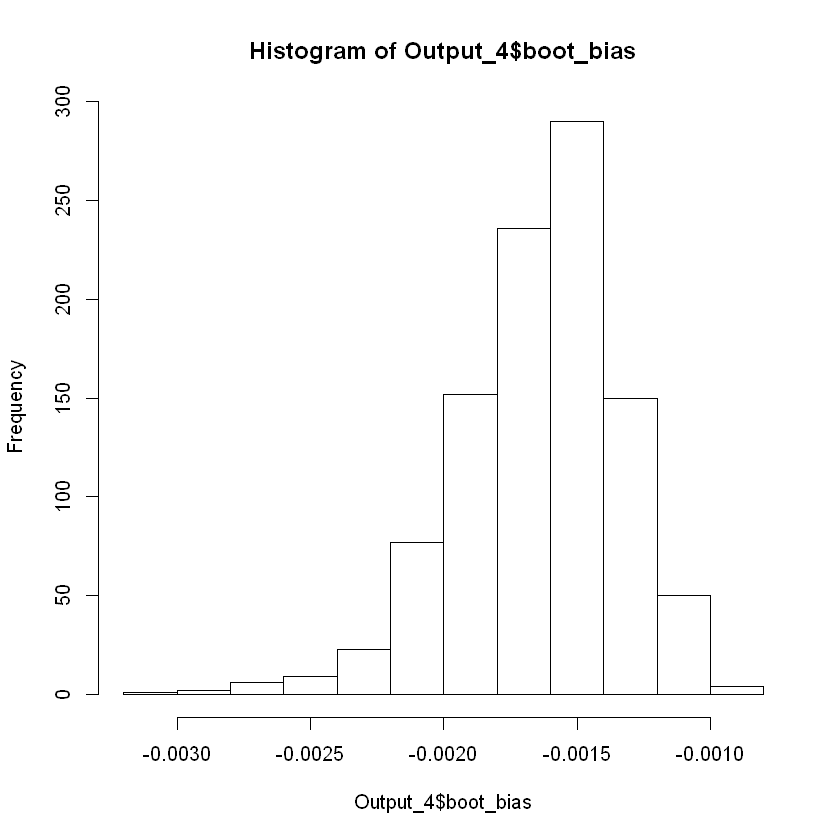

In [15]:
hist(Output_4$boot_bias)

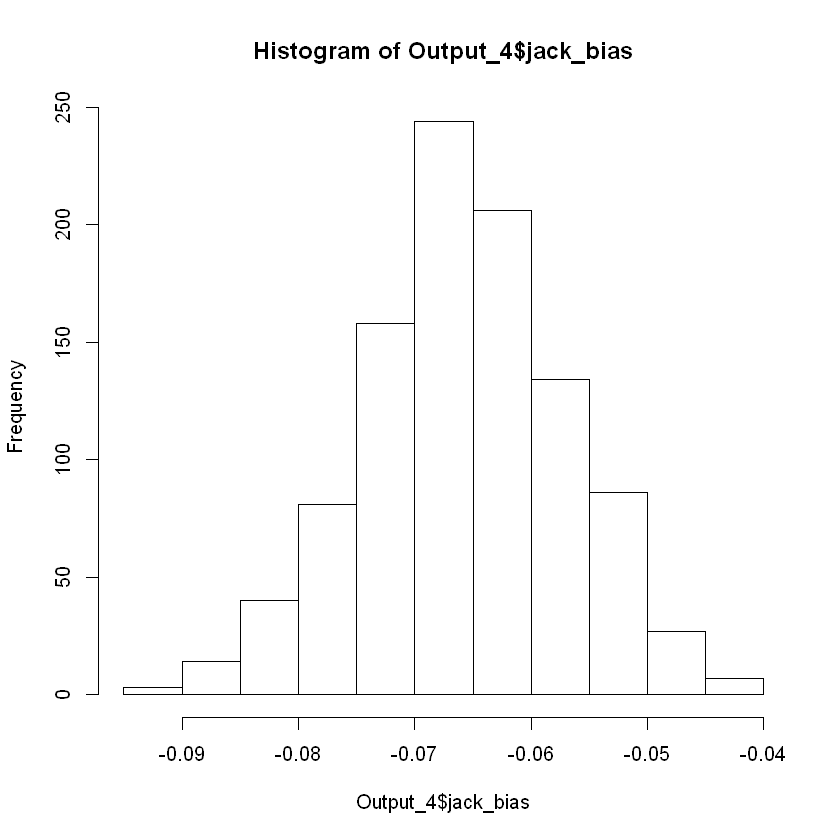

In [16]:
hist(Output_4$jack_bias)

#### Observations
It is observed that the bias from the jackknife is approximately normally distributed. Similarly, the bias from the bootstrap is also approximately normally distributed but is skewed to the left.